#  Project : Housing Prices 
[Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course/overview)
<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png">

# Table of Contents :

* [Loading Data](#loadingdata)
* [Data Dictionary](#datadictionary)
* [Data Exploration](#dataexploration)
* [Data Wrangling](#datawrangle)
* [Model Training](#modeltraining)
* [Evaluation](#evaluation)
* [Predic Test & Submission](#predictest&submission)


# Loading Data <a class="anchor" id="loadingdata"></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
train = pd.read_csv(r'Downloads\Housing\train.csv').drop('Id',axis=1)
test = pd.read_csv(r'Downloads\Housing\test.csv').drop('Id',axis=1)
sub = pd.read_csv(r'Downloads\Housing\sample_submission.csv')

In [3]:
df = pd.concat([train,test],ignore_index=True,sort=False)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


# Data Dictionary <a class="anchor" id="datadictionary"></a>
 
> * MSSubClass : Identifies the type of dwelling involved in the sale.
* MSZoning : Identifies the general zoning classification of the sale.
* LotFrontage : Linear feet of street connected to property
* LotArea : Lot size in square feet
* Street : Type of road access to property
* Alley : Type of alley access to property		
* LotShape : General shape of property 
* LandContour : Flatness of the property
* Utilities : Type of utilities available
* LotConfig : Lot configuration
* LandSlope : Slope of property	
* Neighborhood : Physical locations within Ames city limits
* Condition1 : Proximity to various conditions
* Condition2 : Proximity to various conditions (if more than one is present)
* BldgType : Type of dwelling
* HouseStyle : Style of dwelling
* OverallQual : Rates the overall material and finish of the house
* OverallCond : Rates the overall condition of the house
* YearBuilt : Original construction date
* YearRemodAdd : Remodel date (same as construction date if no remodeling or additions)
* RoofStyle : Type of roof
* RoofMatl : Roof material	
* Exterior1st : Exterior covering on house
* Exterior2nd : Exterior covering on house (if more than one material)
* MasVnrType : Masonry veneer type
* MasVnrArea : Masonry veneer area in square feet
* ExterQual : Evaluates the quality of the material on the exterior 
* ExterCond : Evaluates the present condition of the material on the exterior
* Foundation : Type of foundation	
* BsmtQual : Evaluates the height of the basement
* BsmtCond : Evaluates the general condition of the basement
* BsmtExposure : Refers to walkout or garden level walls
* BsmtFinType1 : Rating of basement finished area
* BsmtFinSF1 : Type 1 finished square feet
* BsmtFinType2 : Rating of basement finished area (if multiple types)
* BsmtFinSF2 : Type 2 finished square feet
* BsmtUnfSF : Unfinished square feet of basement area
* TotalBsmtSF : Total square feet of basement area
* Heating : Type of heating
* HeatingQC : Heating quality and condition
* CentralAir : Central air conditioning	
* Electrical : Electrical system
* 1stFlrSF : First Floor square feet 
* 2ndFlrSF : Second floor square feet
* LowQualFinSF : Low quality finished square feet (all floors)
* GrLivArea : Above grade (ground) living area square feet
* BsmtFullBath : Basement full bathrooms
* BsmtHalfBath : Basement half bathrooms
* FullBath : Full bathrooms above grade
* HalfBath : Half baths above grade
* Bedroom : Bedrooms above grade (does NOT include basement bedrooms)
* Kitchen : Kitchens above grade
* KitchenQual : Kitchen quality
* TotRmsAbvGrd : Total rooms above grade (does not include bathrooms) 
* Functional : Home functionality (Assume typical unless deductions are warranted)	
* Fireplaces : Number of fireplaces
* FireplaceQu : Fireplace quality	
* GarageType : Garage location
* GarageYrBlt : Year garage was built		
* GarageFinish : Interior finish of the garage
* GarageCars : Size of garage in car capacity
* GarageArea : Size of garage in square feet
* GarageQual : Garage quality
* GarageCond : Garage condition
* PavedDrive : Paved driveway
* WoodDeckSF : Wood deck area in square feet
* OpenPorchSF : Open porch area in square feet
* EnclosedPorch : Enclosed porch area in square feet
* 3SsnPorch : Three season porch area in square feet
* ScreenPorch : Screen porch area in square feet
* PoolArea : Pool area in square feet 
* PoolQC : Pool quality
* Fence : Fence quality
* MiscFeature : Miscellaneous feature not covered in other categories	
* MiscVal : $Value of miscellaneous feature
* MoSold : Month Sold (MM)
* YrSold : Year Sold (YYYY)
* SaleType : Type of sale		
* SaleCondition : Condition of sale

# Data Exploration <a class="anchor" id="dataexploration"></a>

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [5]:
shape = df.shape
print('The train data had {} rows and {} columns'.format(shape[0],shape[1]))

The train data had 2919 rows and 80 columns


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

In [8]:
df.duplicated().sum()

0

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Num Of Missing Values,0,4,486,0,0,2721,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,24,23,0,0,0,81,82,82,79,1,80,1,1,1,0,0,0,1,0,0,0,0,2,2,0,0,0,0,1,0,2,0,1420,157,159,159,1,1,159,159,0,0,0,0,0,0,0,2909,2348,2814,0,0,0,1,0
% Of Missing Values,0,0.137033,16.6495,0,0,93.2169,0,0,0.0685166,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0342583,0.0342583,0.822199,0.787941,0,0,0,2.77492,2.80918,2.80918,2.70641,0.0342583,2.74066,0.0342583,0.0342583,0.0342583,0,0,0,0.0342583,0,0,0,0,0.0685166,0.0685166,0,0,0,0,0.0342583,0,0.0685166,0,48.6468,5.37855,5.44707,5.44707,0.0342583,0.0342583,5.44707,5.44707,0,0,0,0,0,0,0,99.6574,80.4385,96.4029,0,0,0,0.0342583,0


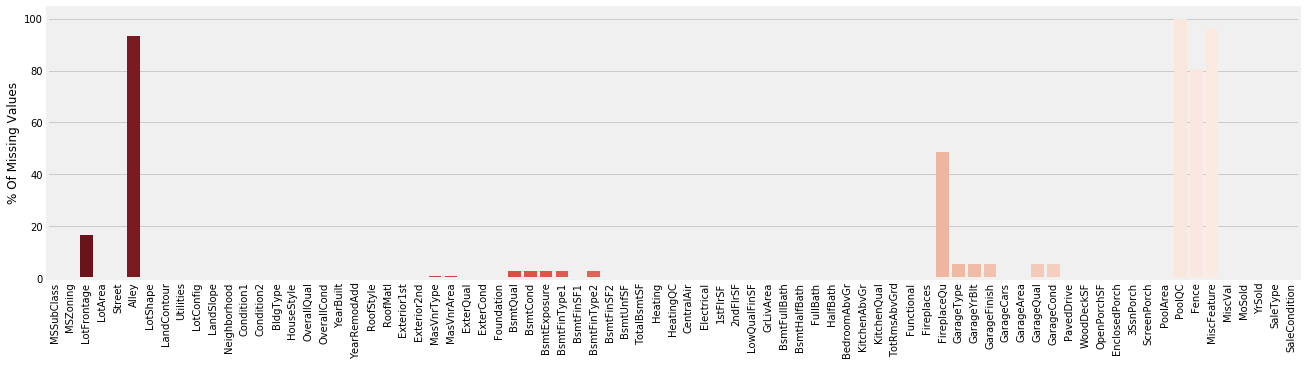

In [9]:
def missing_value(df):
    nan = df.isnull().sum()
    nan_proportion = (nan/len(df))*100
    nan_table = pd.concat([nan,nan_proportion],axis=1).rename(columns = {0:'Num Of Missing Values',1:'% Of Missing Values'})
    return nan_table
miss = missing_value(df[df.columns[:-1]])
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=miss.index, y='% Of Missing Values', data=miss, palette='Reds_r')
plt.xticks(rotation=90)
display(miss.T.style.background_gradient(cmap='Reds', axis=1))

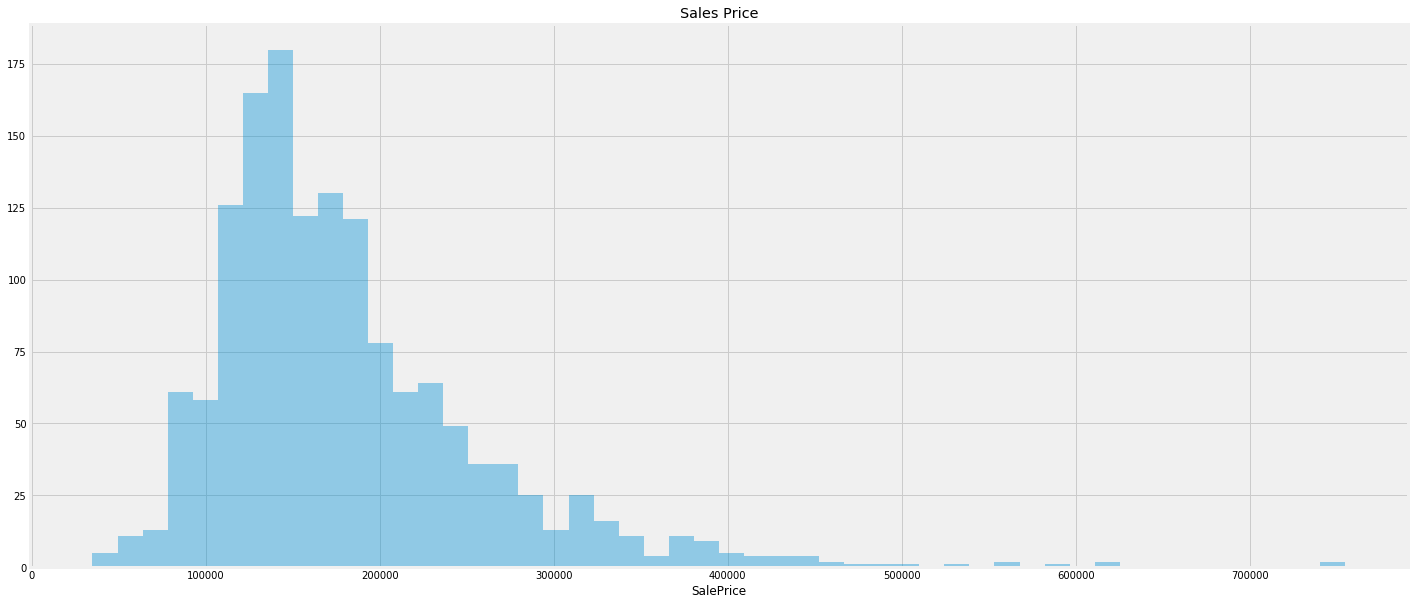

In [10]:
plt.figure(figsize=(22,10))
sns.distplot(train.SalePrice,bins=50,kde=False)
plt.title('Sales Price')
plt.show()

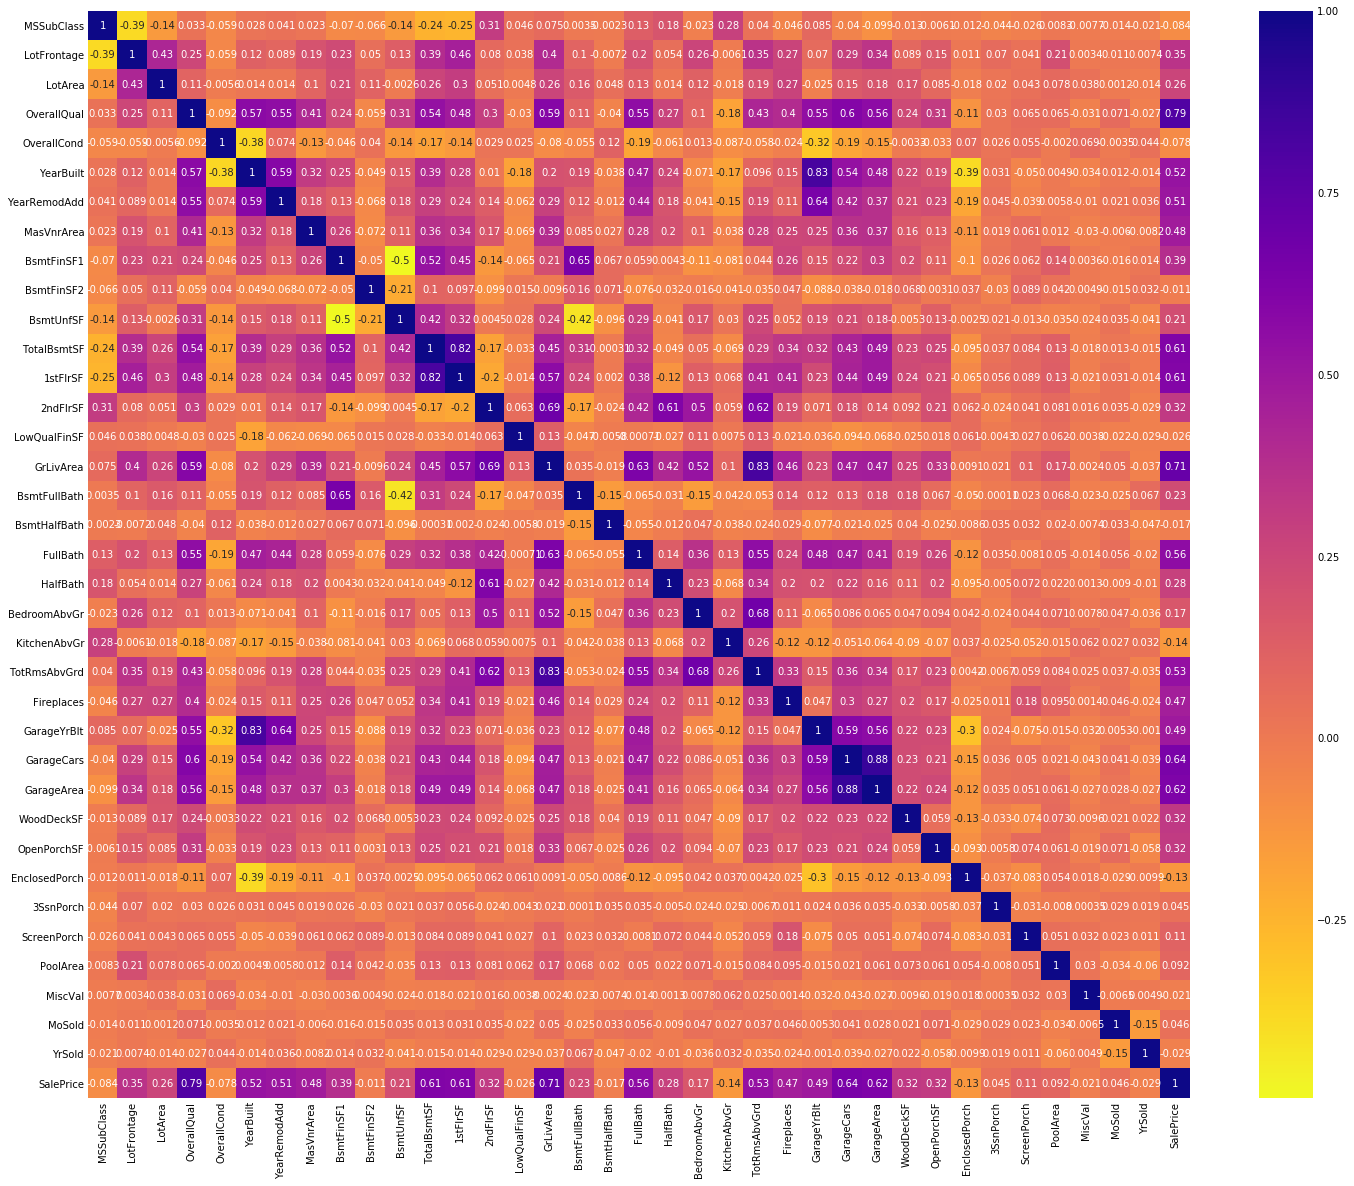

In [11]:
plt.figure(figsize=(22,20))
sns.heatmap(train.corr(),annot=True,cmap='plasma_r')
plt.show()

# Data Wrangling <a class="anchor" id="datawrangle"></a>

***Define***
- Drop rows that had outliers in SalesPrice

**Code**

In [12]:
train = train[train.SalePrice<=500000].reset_index(drop=True)
df = pd.concat([train,test],ignore_index=True,sort=False)

***Test***

In [13]:
assert df[df.SalePrice>500000].SalePrice.sum() == 0

***Define***
- Drop columns that had low correlation with SalesPrice columns

**Code**

In [14]:
df.drop(['EnclosedPorch','KitchenAbvGr','MSSubClass'],axis=1,inplace=True)

***Test***

In [15]:
assert any(col not in df.columns for col in ['EnclosedPorch','KitchenAbvGr','MSSubClass'])

***Define***
- Drop columns that had more than 25% missing data

**Code**

In [16]:
miss_col = [col for col in miss.index[:-1] if miss.loc[col].iloc[1] >=25]
df.drop(miss_col,axis=1,inplace=True)
miss.drop(miss_col,inplace=True)

***Test***

In [17]:
assert any(col not in df.columns for col in miss_col)

***Define***
- Impute columns that had lower than 25% missing data

**Code**

In [18]:
miss_col2 = [[col,df[col].dtype] for col in miss.index[:-1] if miss.loc[col].iloc[1] >0]
for col,dtype in miss_col2:
    if dtype=='object':
        df[col]=df[col].fillna(df[col].mode()[0])
    else:
        df[col]=df[col].fillna(df[col].mean())

***Test***

In [19]:
assert all(df[df.columns[:-1]].isnull().sum() == 0)

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Num Of Missing Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
% Of Missing Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


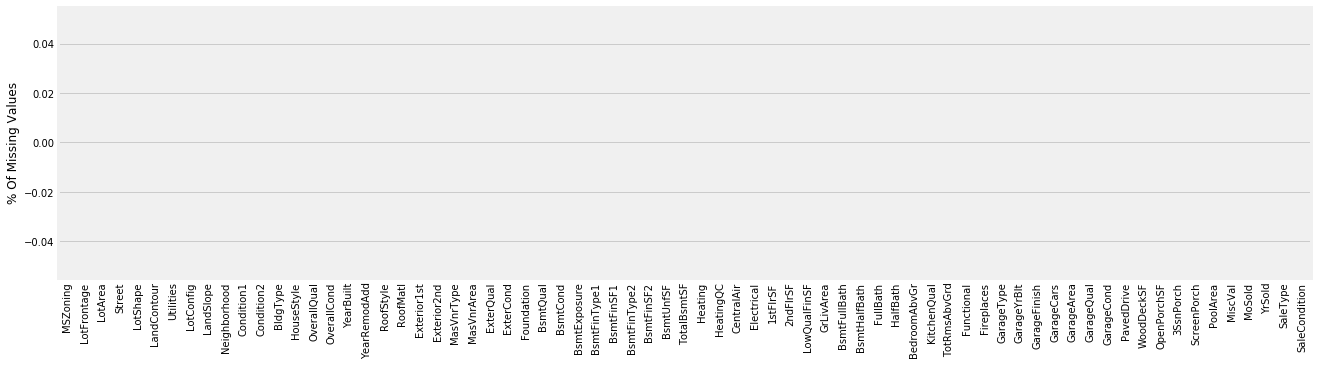

In [20]:
miss = missing_value(df[df.columns[:-1]])
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=miss.index, y='% Of Missing Values', data=miss, palette='Reds_r')
plt.xticks(rotation=90)
display(miss.T.style.background_gradient(cmap='Reds', axis=1))

***Define***
- encode categorical columns that had lower than 10 unique value by one hot encoding method
- encode categorical columns that had more than 10 unique value by ordinal encoding method

**Code**


In [21]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

obj_col = [col for col in df.columns if df[col].dtype=='object']
n_uni = [col for col in obj_col if df[col].nunique()<10]
n_uni2 = [col for col in obj_col if df[col].nunique()>10]
#Ordinal Encoding
for col in n_uni2:
    encoder = OrdinalEncoder()
    df[col] = encoder.fit_transform(df[col].values.reshape(-1,1))
#One Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder.fit(df[n_uni])
one_hot_columns = encoder.get_feature_names(list(n_uni))
train_one_hot = pd.DataFrame(encoder.transform(df[n_uni]), 
                             columns=one_hot_columns)
df.drop(columns=n_uni, axis=1, inplace=True)
df[train_one_hot.columns] = train_one_hot

***Test***

In [22]:
assert any(df[col].dtype !='object' for col in df.columns)

In [23]:
df.head()

,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,5.0,7,5,2003,2003,12.0,13.0,196.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,80.0,9600,24.0,6,8,1976,1976,8.0,8.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,68.0,11250,5.0,7,5,2001,2002,12.0,13.0,162.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60.0,9550,6.0,7,5,1915,1970,13.0,15.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,84.0,14260,15.0,8,5,2000,2000,12.0,13.0,350.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Model Training <a class="anchor" id="modeltraining"></a>

In [24]:
from sklearn.model_selection import train_test_split
train , test = df.loc[train.index] , df.loc[train.index[-1]+1:].drop('SalePrice',axis=1)
test.reset_index(drop=True,inplace=True)
X,y= train.drop(['SalePrice'],axis=1), train["SalePrice"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error

#### linear model
***search for best tuned linear model***

In [28]:
pip = Pipeline([('scaler',StandardScaler()),
    ('polynomialfeatures',PolynomialFeatures()),
    ('regressor',LinearRegression())
])
param_grid = [{'scaler':[StandardScaler(),MinMaxScaler()],
               'polynomialfeatures__degree':np.arange(1,4),
             'regressor':[LinearRegression()]},
              {'scaler':[StandardScaler(),MinMaxScaler()],
               'polynomialfeatures__degree':np.arange(1,4),
               'regressor':[Ridge(),Lasso()],
               'regressor__alpha':[0.1,10,50,70,100]}]
reg_grid = GridSearchCV(pip,param_grid,cv=3,n_jobs=-1,scoring="neg_mean_absolute_error")
reg_grid.fit(X_train,y_train)

C:\Users\omar mohamed\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('regressor',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
          

In [29]:
reg_grid.best_params_

{'polynomialfeatures__degree': 2,
 'regressor': Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
       random_state=None, solver='auto', tol=0.001),
 'regressor__alpha': 50,
 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1))}

In [31]:
ridge = make_pipeline(MinMaxScaler(),PolynomialFeatures(degree=2),Ridge(alpha=50))

#### Random Forest Model
***search for best parameter***

In [32]:
rfor = RandomForestRegressor()
params = {
    "bootstrap" : [False,True],
    "max_features": [0.3, 0.6, 1],
    "n_estimators": [1000]}
rfor_grid = GridSearchCV(rfor, param_grid=params, cv=3 ,scoring="neg_mean_absolute_error", n_jobs=-1)
rfor_grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [False, True],
     

In [33]:
rfor_grid.best_params_

{'bootstrap': False, 'max_features': 0.3, 'n_estimators': 1000}

#### XGBoost
***search for best parameter***

In [34]:
xgb = XGBRegressor()
param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }


xgb_grid = GridSearchCV(estimator = xgb,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error',
                           cv = 3,
                           n_jobs = -1)
xgb_grid.fit(X_train,y_train)

C:\Users\omar mohamed\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,...
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7],
                         'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 5, 7, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [1

In [35]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

### Voting Regressor
***make a voting for ridge,random forest,xgboost models***

In [36]:
regressor=[('Ridge', ridge),
           ('random forest', RandomForestRegressor(bootstrap= True, max_features= 0.3,n_estimators= 1000)),
          ('xgbr',XGBRegressor(n_estimators=2000 #raise num of n_estimators
        ,objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.01,
        max_depth = 7,
        min_child_weight = 1,
        subsample = 0.5))]
vc= VotingRegressor(estimators=regressor,n_jobs=-1)
vc.fit(X_train,y_train)

VotingRegressor(estimators=[('Ridge',
                             Pipeline(memory=None,
                                      steps=[('minmaxscaler',
                                              MinMaxScaler(copy=True,
                                                           feature_range=(0,
                                                                          1))),
                                             ('polynomialfeatures',
                                              PolynomialFeatures(degree=2,
                                                                 include_bias=True,
                                                                 interaction_only=False,
                                                                 order='C')),
                                             ('ridge',
                                              Ridge(alpha=50, copy_X=True,
                                                    fit_intercept=True,
                          

# Evaluation <a class="anchor" id="evaluation"></a>

In [37]:
y_pred = vc.predict(X_test)

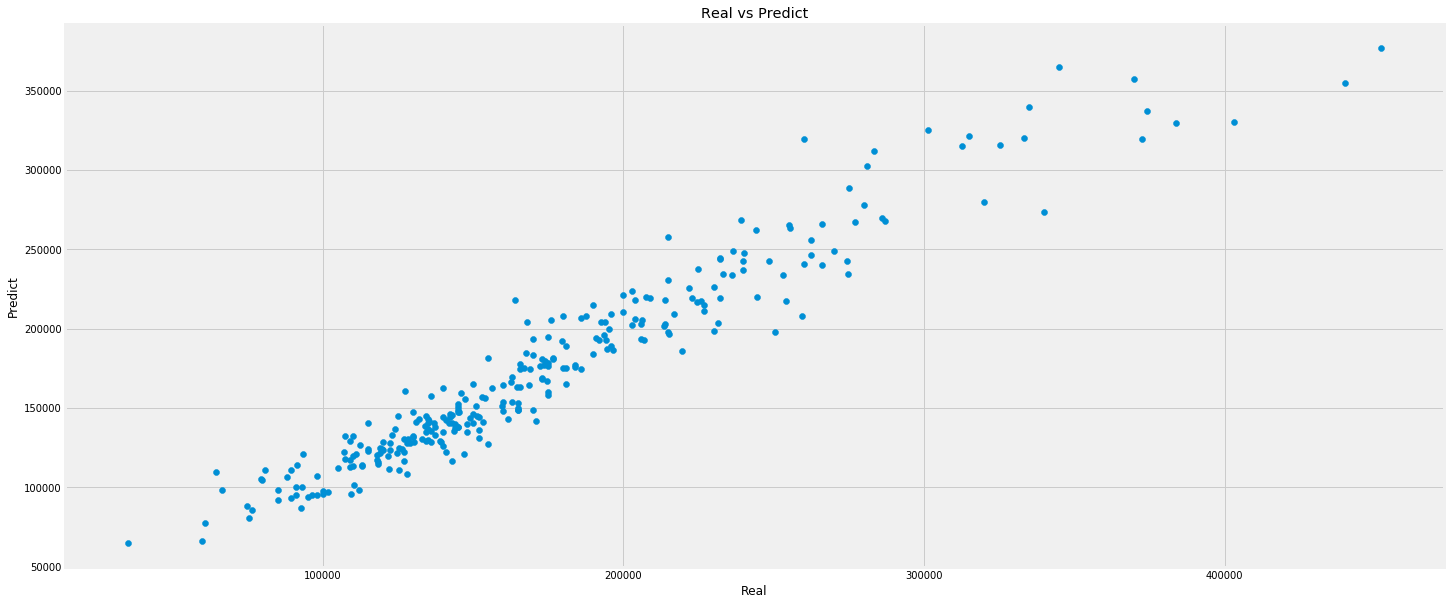

In [38]:
#Plot Real vs Predict
plt.figure(figsize=(22,10))
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Real')
plt.ylabel('Predict')
plt.title("Real vs Predict")
plt.show()

# Predic Test & Submission <a class="anchor" id="predictest&submission"></a>

In [40]:
prediction = vc.predict(test)
sub['SalePrice'] = prediction
sub.to_csv('sample_submisson.csv',index=False)